# Natural Language Processing Workshop Ex 2


SemEval 2017 Task 5 Fine-Grained Sentiment Analysis on Financial Microblogs and News
http://alt.qcri.org/semeval2017/task5/

Task Reference Paper
http://www.aclweb.org/anthology/S17-2089

More reference Paper
http://www.aclweb.org/anthology/S/S17/ 


## Data Exploration

https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/

- Variable Identification
- Univariate Analysis
- Bi-variate Analysis
- Missing Value Treatment
- Outlier Detection and Treatment
- Feature Engineering


In [2]:
# Import the necessary modules
import pandas as pd
pd.set_option('display.max_colwidth', -1)

import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

# Magic to tell python notebook we want matplotlib charts included
%matplotlib inline

In [3]:
# LOAD JSON DATA 
df = pd.read_json("data/training_set.json")

In [4]:
print(df.iloc[0])
print(df.iloc[0].tweet)

sentiment   -0.463                                                                                                    
snippet      downgrade                                                                                                
target       $PCAR                                                                                                    
tweet        downgrades $SON $ARI $GG $FLTX $WMC $MFA $IVR $CMI $PCAR $QLIK $AFOP $UNFI #stocks #investing #tradeideas
Name: 0, dtype: object
downgrades $SON $ARI $GG $FLTX $WMC $MFA $IVR $CMI $PCAR $QLIK $AFOP $UNFI #stocks #investing #tradeideas


In [8]:
print('######### Columns #########')
print(df.columns)

print('\n######### Info : Identify Missing Value #########')
print(df.info())

print('\n######### Data Types #########')
print(df.dtypes.value_counts())

######### Columns #########
Index(['sentiment', 'snippet', 'target', 'tweet'], dtype='object')

######### Info : Identify Missing Value #########
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 4 columns):
sentiment    1396 non-null float64
snippet      1396 non-null object
target       1396 non-null object
tweet        1396 non-null object
dtypes: float64(1), object(3)
memory usage: 43.7+ KB
None

######### Data Types #########
object     3
float64    1
dtype: int64


In [14]:
######### Distribution of Target #########
print(df['target'].value_counts(dropna=False).head(10))

$AAPL    112
$SPY      57
$FB       49
$TSLA     46
$AMZN     22
$BBRY     22
$GOOG     19
$NFLX     18
$YHOO     16
$AMRN     13
Name: target, dtype: int64


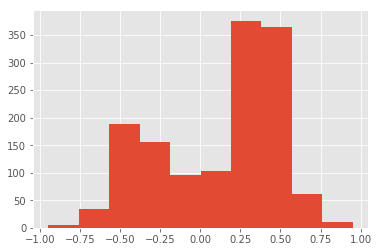

In [7]:
######### Distribution of Sentiment #########
df.sentiment.hist()

In [13]:
import numpy as np

conditions = [
    (df['sentiment'] == 0) , 
    (df['sentiment'] <  0) ,
    (df['sentiment'] >  0)]
choices = ['neutral', 'bullish', 'bearish']
df['classes'] = np.select(conditions, choices)
print(df)

      sentiment  \
0    -0.463       
1     0.678       
2     0.377       
3     0.129       
4     0.395       
5     0.458       
6     0.288       
7    -0.453       
8     0.372       
9     0.216       
10    0.241       
11    0.557       
12    0.419       
13   -0.641       
14    0.344       
15   -0.289       
16    0.430       
17   -0.147       
18    0.484       
19    0.529       
20    0.406       
21   -0.317       
22    0.374       
23    0.589       
24   -0.195       
25   -0.591       
26    0.422       
27   -0.374       
28    0.489       
29   -0.140       
...     ...       
1366  0.194       
1367  0.598       
1368  0.314       
1369 -0.382       
1370 -0.039       
1371 -0.259       
1372  0.329       
1373  0.259       
1374  0.222       
1375 -0.573       
1376 -0.451       
1377  0.511       
1378  0.294       
1379 -0.133       
1380  0.452       
1381  0.168       
1382  0.272       
1383 -0.134       
1384  0.419       
1385  0.219       
1386  0.529 

In [16]:
print(df['classes'].value_counts(dropna=False))

bearish    917
bullish    455
neutral    24 
Name: classes, dtype: int64


## Preprocessing Tweets

### Tweets Tokenizer

https://www.nltk.org/api/nltk.tokenize.html


In [46]:
######### Introducing Tweeter Tokenizer #########
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize

# What is Tweet Tokenizer? 
ttokenizer = ______()

sample = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"

print(ttokenizer.______(sample))



['This', 'is', 'a', 'cooool', '#dummysmiley', ':', ':-)', ':-P', '<3', 'and', 'some', 'arrows', '<', '>', '->', '<--']
['This', 'is', 'a', 'coool', '#dummysmiley', ':', ':-)', ':-P', '<3', 'and', 'some', 'arrows', '<', '>', '->', '<--']
['@', 'mention', '@', 'mention', '$', '123.12', '56.5', '%', 'RT', '#', 'this', '#', 'awesome', '!', '!', '#', 'great', '#', 'MakeAmericaGreatAgain', '$', 'CASHTAG']
['@mention', '@mention', '$', '123.12', '56.5', '%', 'RT', '#this', '#awesome', '!', '!', '#great', '#MakeAmericaGreatAgain', '$', 'CASHTAG']


In [ ]:
# Is There a Need to Handle Long Words? 
ttokenizer2 = TweetTokenizer(______=True, ______=True)
print(ttokenizer2.tokenize(sample))

In [ ]:
# What is the difference with a normal Tokenizer and TweetTokenizer
sample2 = "@mention@mention $123.12 56.5% RT #this#awesome!!#great#MakeAmericaGreatAgain $CASHTAG"

print(______(sample2))
print(ttokenizer.______(sample2))

### HashTag Analysis

In [25]:
######### Importing Packages #########
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import FreqDist

tt = TweetTokenizer()
stemmer = PorterStemmer()
rt = RegexpTokenizer(______)

In [28]:
######### Identifying what is the most common HashTag #########
hashtag_list = []

def hashtagExtraction(tweet):
    tokens = ______.______(tweet)
    for word in tokens: 
        if word.______('#'):
            hashtag_list.append(word)

In [29]:
df['tweet'] = df['tweet'].str.______()
df['tweet'].apply(______)
print(hashtag_list[:30])

['#stocks', '#investing', '#tradeideas', '#stocks', '#investors', '#facebook', '#oversold', '#amazon', '#bezos', '#echo', '#alexa', '#fastmoneyespresso', '#tomsosnoff', '#fastmoneyespresso', '#hepatitis', '#livermeeting', '#liver15', '#cuba', '#iphone', '#iphone', '#netpayoutyields', '#stocks', '#investing', '#sentiment', '#sp1500', '#stocks', '#stocktrading', '#predictiveanalytics', '#bigdata', '#fastmoneyespresso']


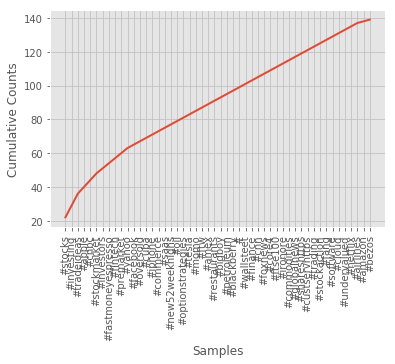

[('#stocks', 22),
 ('#investing', 7),
 ('#tradeideas', 7),
 ('#apple', 4),
 ('#cnbc', 4),
 ('#stockmarket', 4),
 ('#investors', 3),
 ('#fastmoneyespresso', 3),
 ('#fintech', 3),
 ('#premarket', 3),
 ('#yahoo', 3),
 ('#facebook', 2)]

In [30]:
fd = FreqDist(hashtag_list)
fd.plot(50, ______=True)
fd.______(12)

### RT User Analysis

In [40]:
######### Identifying who is the most frequently Retweeted User #########
rt_user_list = []

def rt_user_Extraction(tweet):
    tokens = ______.______(tweet)
    if ____________ and ____________:
        rt_user_list.append(______)

In [42]:
df['tweet'].apply(rt_user_Extraction)

print('Number of RT Users: ', len(rt_user_list))
print(rt_user_list[:30])

Number of RT Users:  76
['@omillionaires', '@traderstewie', '@dasan', '@cash_cow', '@montisumo', '@ldrogen', '@flare9x', '@alphatrends', '@joemccann', '@firstadopter', '@alphatrends', '@mlp_protocol', '@flare9x', '@bman1', '@ldrogen', '@montisumo', '@stocktwits', '@kdouble', '@nodoji', '@alans', '@montisumo', '@vconomics', '@stockdemons', '@flare9x', '@highgrowthfinancial', '@montisumo', '@peterlbrandt', '@montisumo', '@dostoevsky', '@emrul']


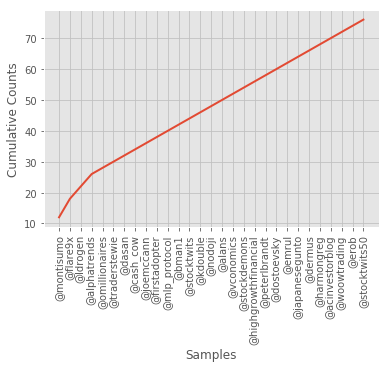

[('@montisumo', 12),
 ('@flare9x', 6),
 ('@ldrogen', 4),
 ('@alphatrends', 4),
 ('@omillionaires', 2)]

In [43]:
fd = FreqDist(rt_user_list)
fd.plot(30, cumulative=True)
fd.most_common(5)

### Word Frequency Analysis

In [51]:
######### First we can Visualize using Wordcloud  #########
from wordcloud import WordCloud,STOPWORDS

train_pos = df[ df['classes'] == 'bullish']
train_pos = df['tweet']
train_neg = df[ df['classes'] == 'bearish']
train_neg = df['tweet']

Bullish words


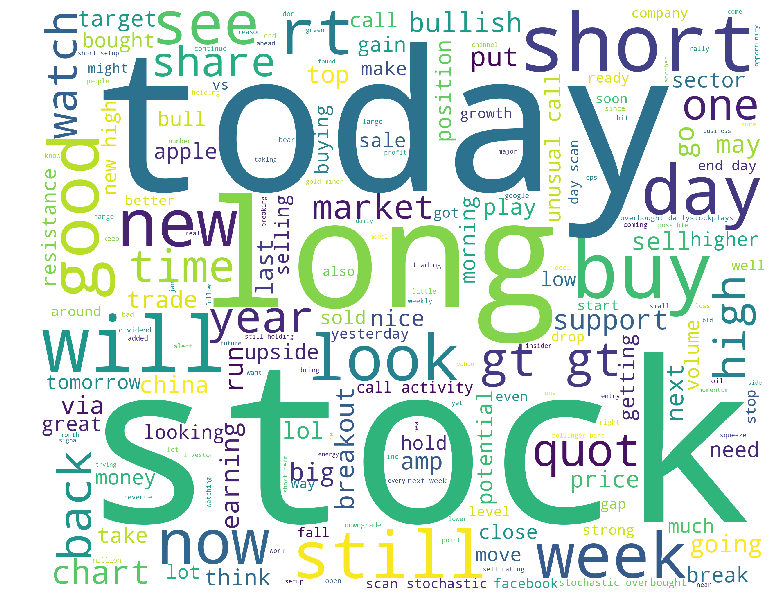

Bearish words


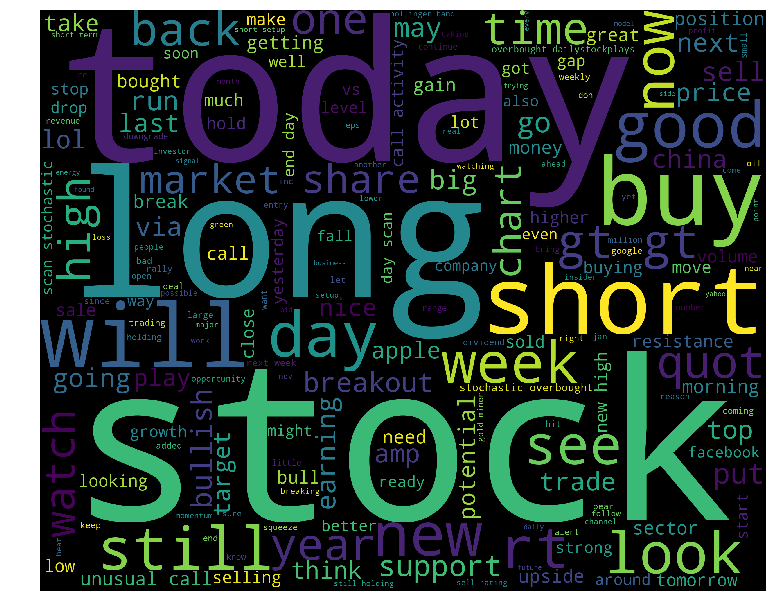

In [50]:
def wordcloud_draw(data, color):
    #Join to Single String
    words = ' '.join(data)
    #Clean Words (Remove mentions, HashTag, CashTag and RT)
    cleaned_word = " ".join([word for word in words.split()
                               if ______                # Clean URL
                                  and ______      # Clean @
                                  and ______      # Clean #
                                  and ______     # Clean $
                                  and ______                 # Clean RT
                            ])
    
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Bullish words")
wordcloud_draw(train_pos,'white')
print("Bearish words")
wordcloud_draw(train_neg,'black')

### Sentiment Analysis with TextBlob and NLTK

In [6]:
from textblob import TextBlob

In [8]:
blob = ______('this is a very sad and negative sentence but all is good')
print(blob.______.______)
print(blob.______.______)

-0.08333333333333333
0.6666666666666666


Negative


D:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


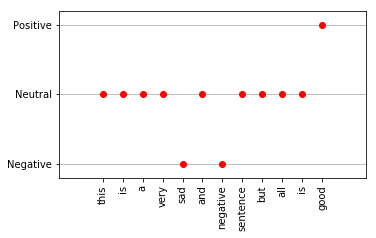

In [5]:
# http://www.nltk.org/api/nltk.sentiment.html
from nltk.sentiment.util import demo_liu_hu_lexicon
# nltk.sentiment.util contains a special function: demo_liu_hu_lexicon(sentence, plot=False)

demo_liu_hu_lexicon('this is a very sad and negative sentence but all is good', plot=True)

## Challenge

In [47]:
######### Identifying what is the most commonly use word  #########
# What to identify when cleaning text / tweets?
# - Remove Stopwords?         # Do you want to add new stopwords?
# - Remove Hashtag or #       # From the hashtag analysis do you think you should strip the # or remove the whole token
# - Remove mentions?          # Remove as it have no value
# - Stemming                  # Optional: does tense affect your analysis
# - Lemmatatizing             # Optional: Words like Better, good have different intensity which will affect sentiment
# - lower case                # Optional: Words like OMG could even effect the sentiment but would it have much impact?
# - punctuations              # Remove unless you intend to look at Emoticons or how punctuations effect sentiment
# - RT                        # Remove as it have no value
# - urls                      # Remove as it have no value
# - cash tag (unique to this dataset)

In [ ]:
######### Creating a Function to Clean Tweets  #########
def cleantweet():
    